In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

In [2]:
exoplanets = pd.read_csv('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?&table=exoplanets')

In [3]:
print(len(exoplanets))
print(exoplanets.columns)

4197
Index(['pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod',
       'pl_controvflag', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbpern', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbsmaxn',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_orbeccenn', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2',
       'pl_orbincllim', 'pl_orbincln', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassn', 'pl_bmassprov', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_radn', 'pl_dens',
       'pl_denserr1', 'pl_denserr2', 'pl_denslim', 'pl_densn', 'pl_ttvflag',
       'pl_kepflag', 'pl_k2flag', 'ra_str', 'dec_str', 'ra', 'st_raerr', 'dec',
       'st_decerr', 'st_posn', 'st_dist', 'st_disterr1', 'st_disterr2',
       'st_distlim', 'st_distn', 'st_optmag', 'st_optmagerr', 'st_optmaglim',
       'st_optband', 'gaia_gmag', 'gaia_gma

In [4]:
ep0 = exoplanets.rename(columns = {"pl_hostname": "host_system", "pl_name": "planet_name", 
                                  "pl_discmethod": "discovery_method", "pl_pnum": "num_planets_in_system",
                                 "pl_orbper": "orbital_period", "ra": "right_ascension", "dec": "declination", 
                                  "st_dist": "distance_parsecs", "st_mass": "stellar_mass", 'pl_bmassj': 'planet_mass'})

ep0.dropna()

,host_system,pl_letter,planet_name,discovery_method,pl_controvflag,num_planets_in_system,orbital_period,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility


In [5]:
ep0
ep = ep0[["host_system", "planet_name", "discovery_method", "num_planets_in_system","orbital_period", 
                "right_ascension", "declination", "distance_parsecs", "stellar_mass", 'planet_mass']]
ep.head()

,host_system,planet_name,discovery_method,num_planets_in_system,orbital_period,right_ascension,declination,distance_parsecs,stellar_mass,planet_mass
0,HD 10180,HD 10180 f,Radial Velocity,6,122.744,24.473234,-60.511528,39.00,1.06,0.0722
1,HD 10180,HD 10180 g,Radial Velocity,6,604.670,24.473234,-60.511528,39.00,1.06,0.0732
2,HD 10180,HD 10180 h,Radial Velocity,6,2205.000,24.473234,-60.511528,39.00,1.06,0.2066
3,HD 10442,HD 10442 b,Radial Velocity,1,1032.300,25.471457,2.704376,135.89,1.01,1.4870
4,HD 10647,HD 10647 b,Radial Velocity,1,989.200,25.622149,-53.740833,17.34,1.11,0.9400


In [6]:
#1: Distance from Earth

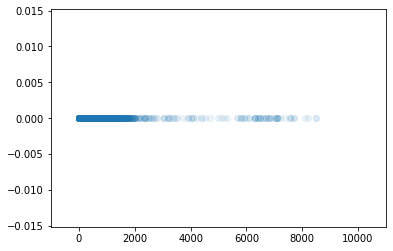

In [7]:
##1a: Distance Line 
x_values = ep['distance_parsecs'].astype('float')
y_values = [0 for row in x_values]
plt.scatter(x_values, y_values, alpha = 0.08)
plt.xlim([-1000,11000])
plt.show()

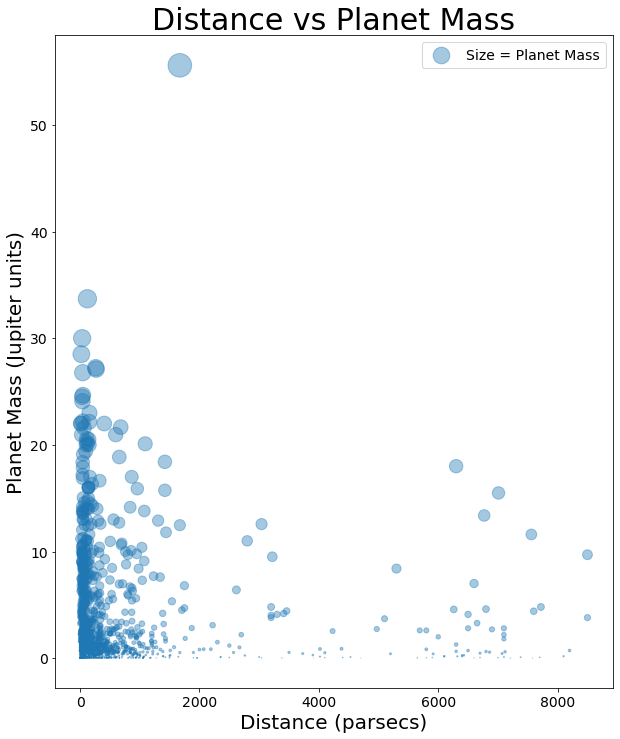

In [8]:
#1b: Distance vs Mass
x_values = ep['distance_parsecs'].astype('float')
y_values = ep['planet_mass'].astype('float')
fig_dm = plt.figure(num=None, figsize=(10, 12), facecolor='w', edgecolor='k')
plt.scatter(x_values, y_values, s=(y_values*10), alpha = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Distance (parsecs)', fontsize=20)
plt.ylabel('Planet Mass (Jupiter units)', fontsize=20)
plt.title('Distance vs Planet Mass', fontsize=30)
plt.legend(['Size = Planet Mass'], fontsize=14)
plt.show()

fig_dm.savefig('Distance vs Planet Mass.png', dpi=200)

In [9]:
#2: Location

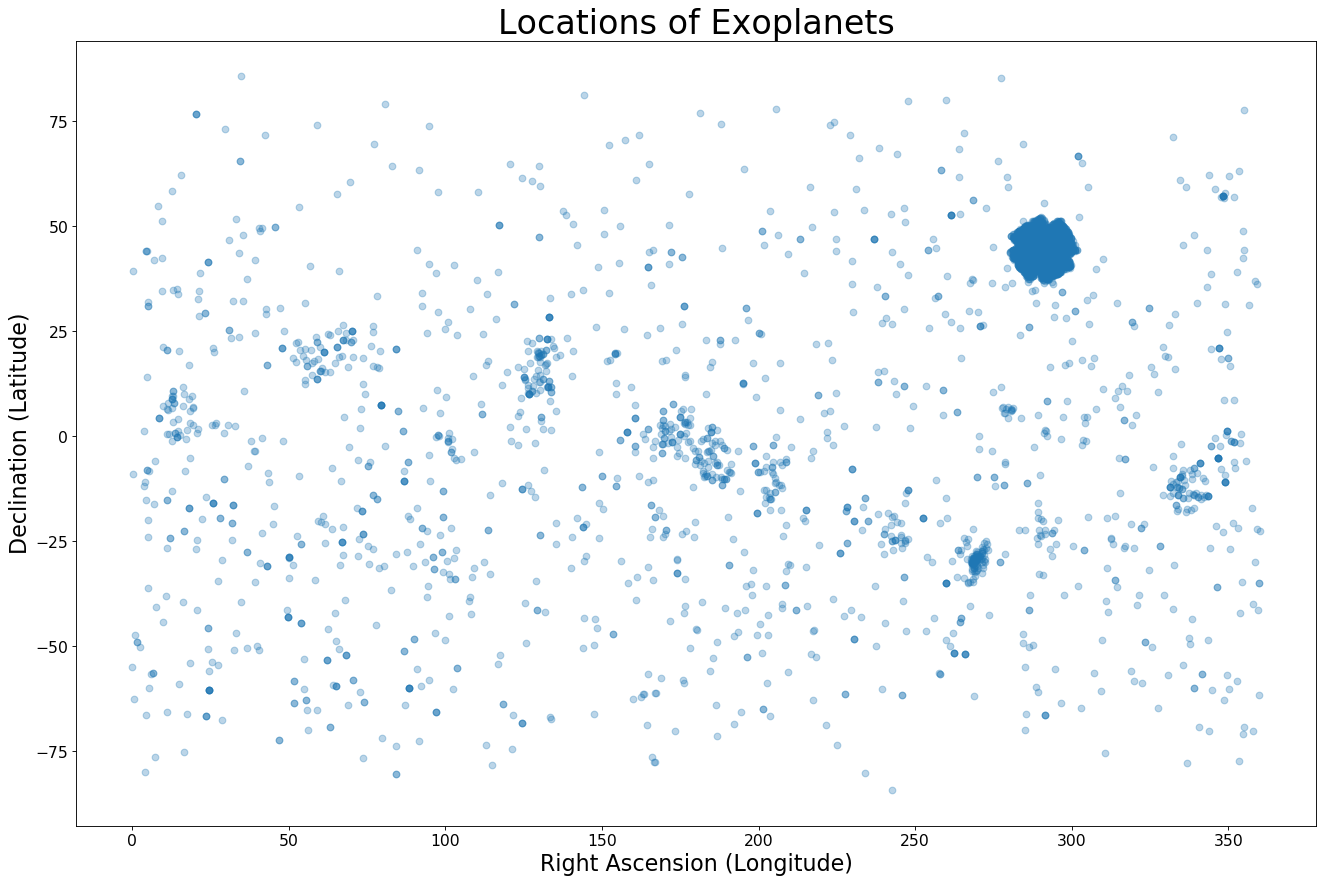

In [10]:
#2a: Location: RA & Dec
x_loc = ep['right_ascension'].astype('float')
y_loc = ep['declination'].astype('float')
fig_rd = plt.figure(num=None, figsize=(20, 13), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_loc, y_loc, alpha = 0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Right Ascension (Longitude)', fontsize=20)
plt.ylabel('Declination (Latitude)', fontsize=20)
plt.title('Locations of Exoplanets', fontsize=30)

plt.show()
fig_rd.savefig('Locations of Exoplanets.png', dpi=200)

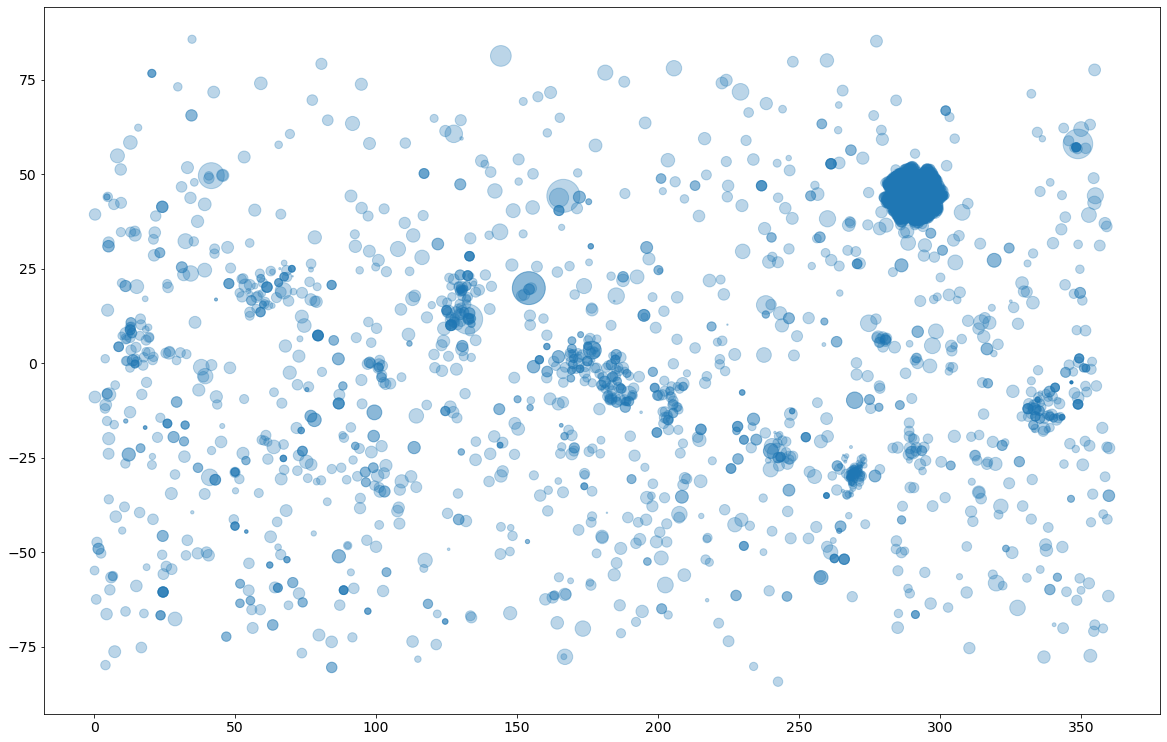

In [11]:
##2b: RA & Dec vs stellar mass 
x_loc = ep['right_ascension'].astype('float')
y_loc = ep['declination'].astype('float')
s = [ep['stellar_mass']*100 for e in x_loc]
plt.figure(num=None, figsize=(20, 13), facecolor='w', edgecolor='k')
plt.scatter(x_loc, y_loc, s=s, alpha = 0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)



plt.show()

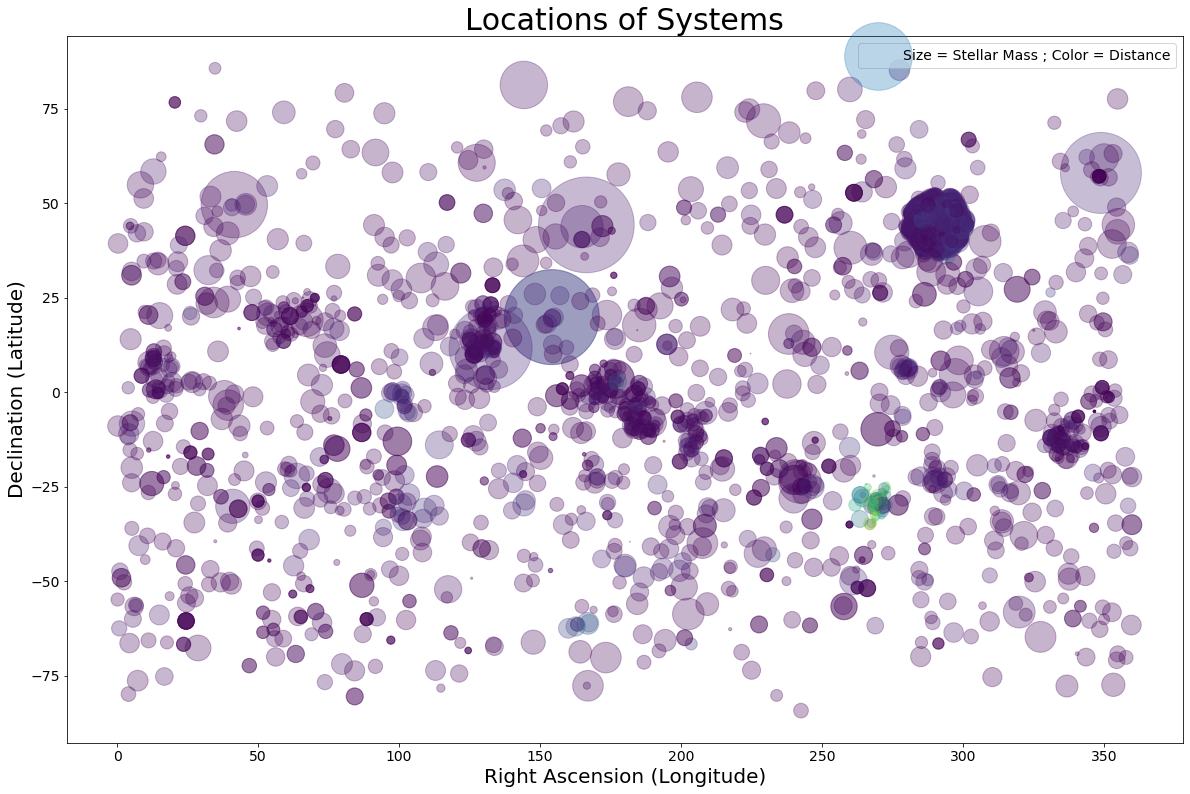

In [12]:
#2c: Location of system vs distance & Stellar mass
x_loc = ep['right_ascension'].astype('float')
y_loc = ep['declination'].astype('float')
s = ep['distance_parsecs']

fig_rd2 = plt.figure(num=None, figsize=(20, 13), facecolor='w', edgecolor='k')


plt.scatter(x_loc, y_loc, c=s, s=(ep['stellar_mass']*40)**1.5, alpha = 0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Right Ascension (Longitude)', fontsize=20)
plt.ylabel('Declination (Latitude)', fontsize=20)
plt.title('Locations of Systems', fontsize=30)
plt.legend(['Size = Stellar Mass ; Color = Distance'], fontsize=14)

plt.show()
fig_rd2.savefig('Locations of Systems.png', dpi=200)

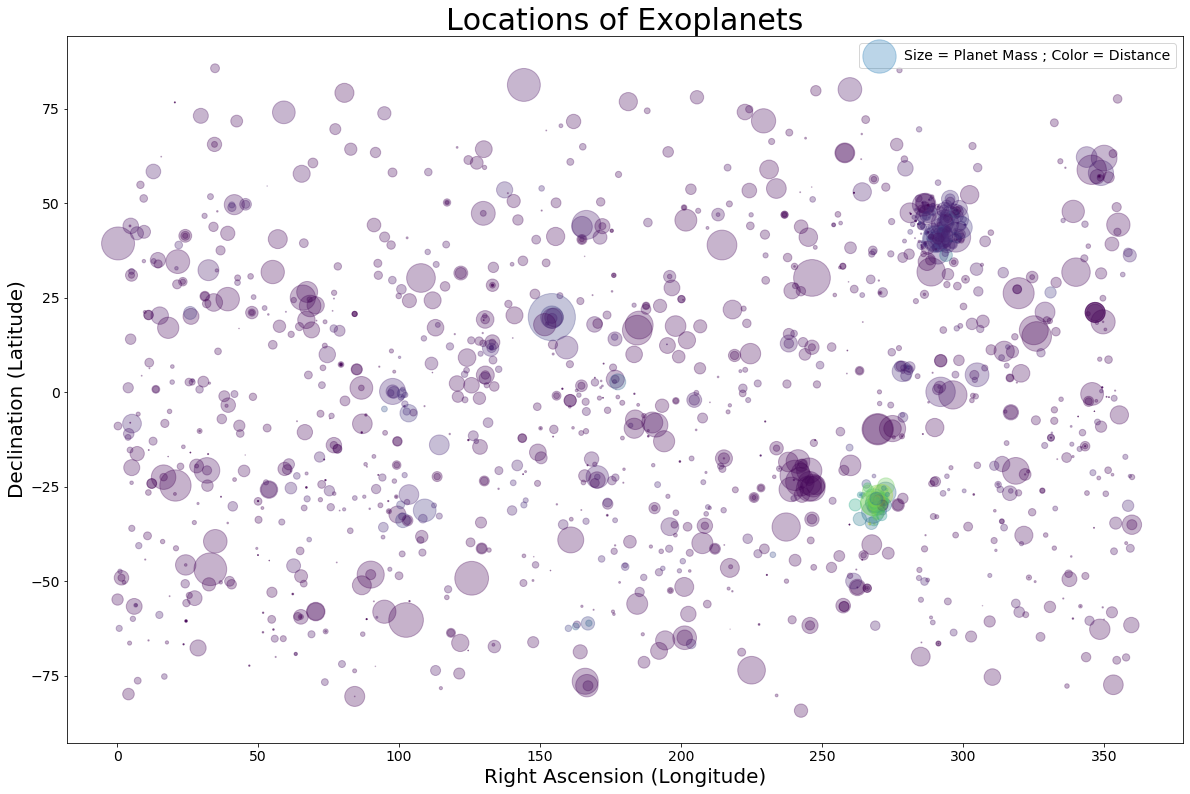

In [13]:
#2cb: Location of planet vs distance & planet mass
x_loc = ep['right_ascension'].astype('float')
y_loc = ep['declination'].astype('float')
s = ep['distance_parsecs']

fig_rd3 = plt.figure(num=None, figsize=(20, 13), facecolor='w', edgecolor='k')


plt.scatter(x_loc, y_loc, c=s, s=(ep['planet_mass']*40), alpha = 0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Right Ascension (Longitude)', fontsize=20)
plt.ylabel('Declination (Latitude)', fontsize=20)
plt.title('Locations of Exoplanets', fontsize=30)
plt.legend(['Size = Planet Mass ; Color = Distance'], fontsize=14)

plt.show()
fig_rd3.savefig('Locations of Exoplanets 2')

In [14]:
#3: Systems 

In [15]:
ep_systems = ep.groupby(by='host_system')
ep_sm = ep_systems.mean()

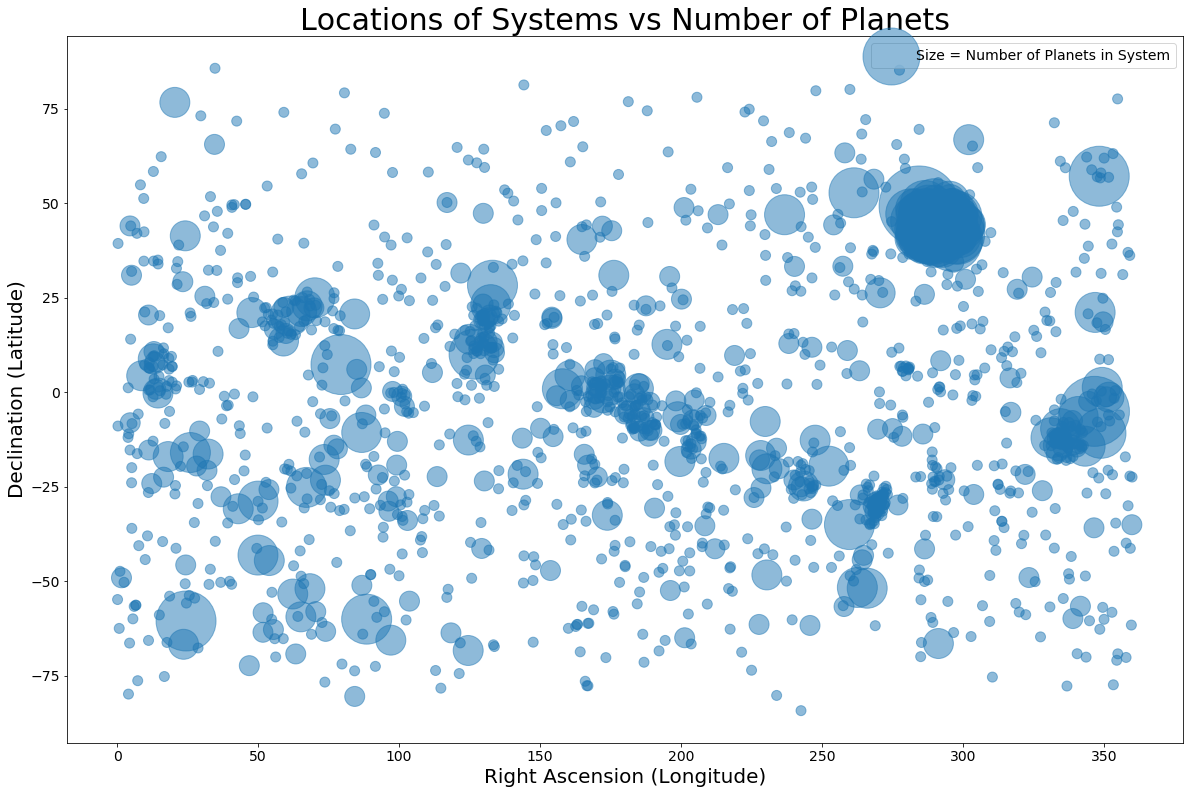

In [16]:
#3a: RA & Dec (system) vs num Planets
x_loc = ep_sm['right_ascension'].astype('float')
y_loc = ep_sm['declination'].astype('float')
s = [(ep_sm['num_planets_in_system']*10)**2 for e in x_loc]
fig_rd4 = plt.figure(num=None, figsize=(20, 13), facecolor='w', edgecolor='k')
plt.scatter(x_loc, y_loc, s=s, alpha = 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Right Ascension (Longitude)', fontsize=20)
plt.ylabel('Declination (Latitude)', fontsize=20)
plt.title('Locations of Systems vs Number of Planets', fontsize=30)
plt.legend(['Size = Number of Planets in System'], fontsize=14)

plt.show()
fig_rd4.savefig('Locations of Systems vs Number of Planets', dpi = 200)

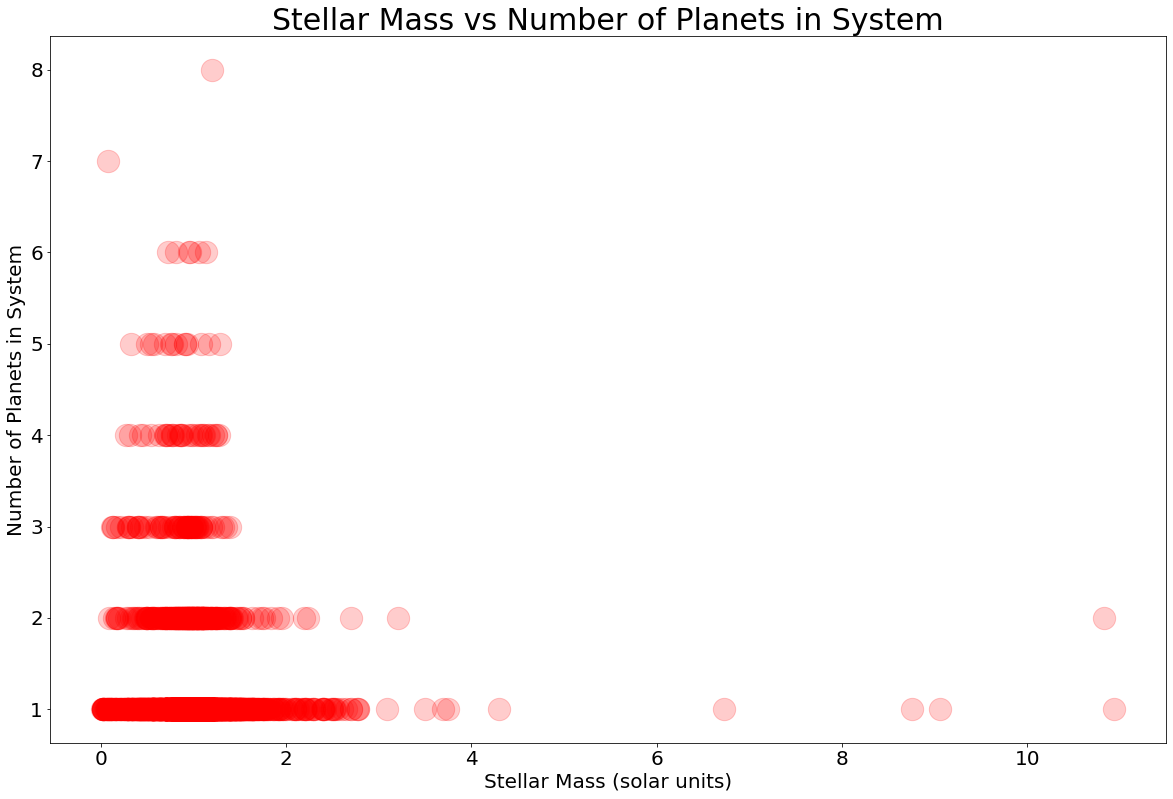

r = nan


In [52]:
#3b: num_planets vs stellar mass

x_values = ep_sm['stellar_mass'].astype('float')
y_values = ep_sm['num_planets_in_system']
fig_sn = plt.figure(num=None, figsize=(20, 13), facecolor='w', edgecolor='k')

plt.scatter(x_values, y_values, s=500, alpha = 0.2, marker = 'o', color = 'red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Stellar Mass (solar units)', fontsize=20)
plt.ylabel('Number of Planets in System', fontsize=20)
plt.title('Stellar Mass vs Number of Planets in System', fontsize=30)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.show()
fig_sn.savefig('Stellar Mass vs Number of Planets in System', dpi = 200)
print(f"r = {rvalue}")

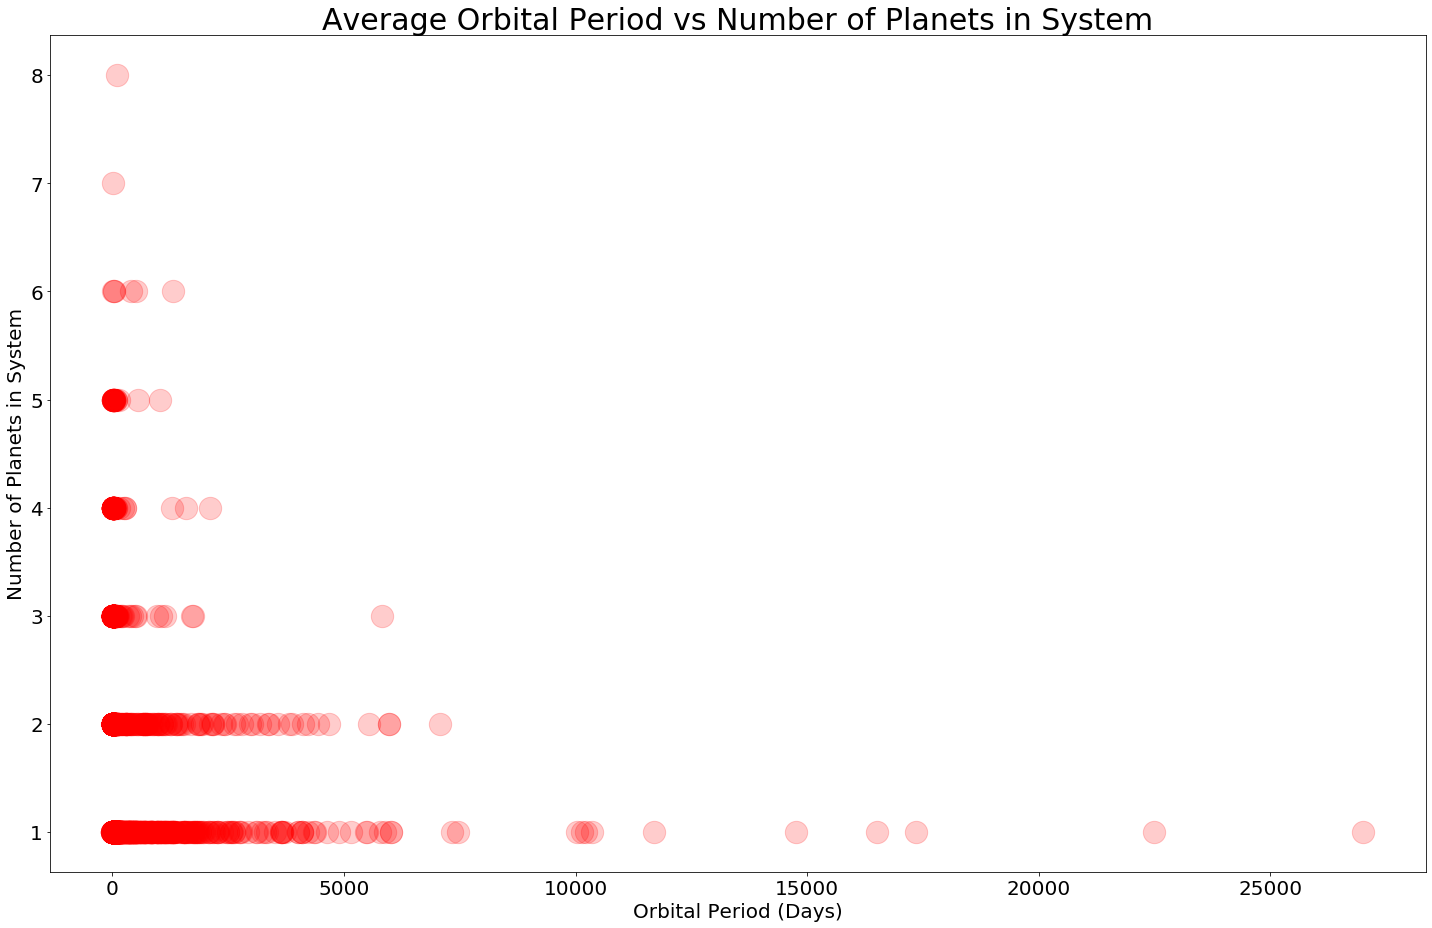

r = -0.014392268943771668


In [53]:
#3c: num planets/system vs orbital period 
epsm = ep_sm.loc[ep_sm['orbital_period'] != 730000]
eps = epsm.loc[ep_sm['orbital_period'] < 92000]

x_values = eps['orbital_period'].astype('float')
y_values = eps['num_planets_in_system']
fig_on = plt.figure(num=None, figsize=(20, 13), facecolor='w', edgecolor='k')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values, s=500, alpha = 0.2, marker = 'o', color = 'red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Orbital Period (Days)', fontsize=20)
plt.ylabel('Number of Planets in System', fontsize=20)
plt.title('Average Orbital Period vs Number of Planets in System', fontsize=30)
plt.tight_layout()
plt.show()
fig_on.savefig('Average Orbital Period vs Number of Planets in System', dpi = 200)
print(f"r = {rvalue}")

In [42]:
eps['orbital_period'].max()

7300000.0

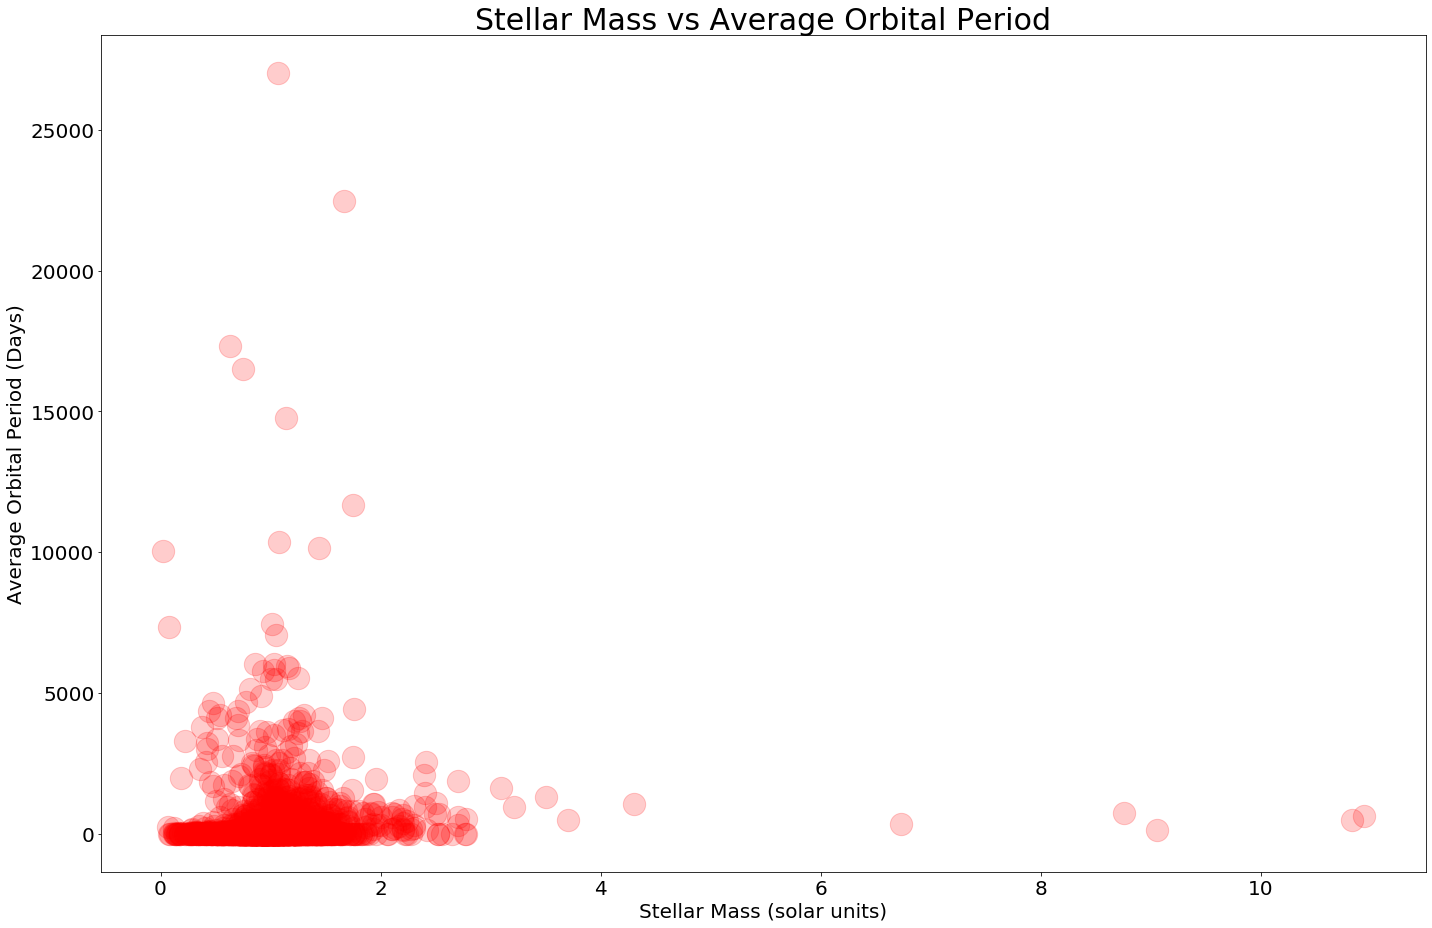

r = nan


In [54]:
#3d: stellar mass vs orbital period
x_values = eps['stellar_mass']
y_values = eps['orbital_period'].astype('float')
fig_so = plt.figure(num=None, figsize=(20, 13), facecolor='w', edgecolor='k')

plt.scatter(x_values, y_values, s=500, alpha = 0.2, marker = 'o', color = 'red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Stellar Mass (solar units)', fontsize=20)
plt.ylabel('Average Orbital Period (Days)', fontsize=20)
plt.title('Stellar Mass vs Average Orbital Period', fontsize=30)
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.show()
fig_so.savefig('Stellar Mass vs Average Orbital Period', dpi=200)
print(f"r = {rvalue}")

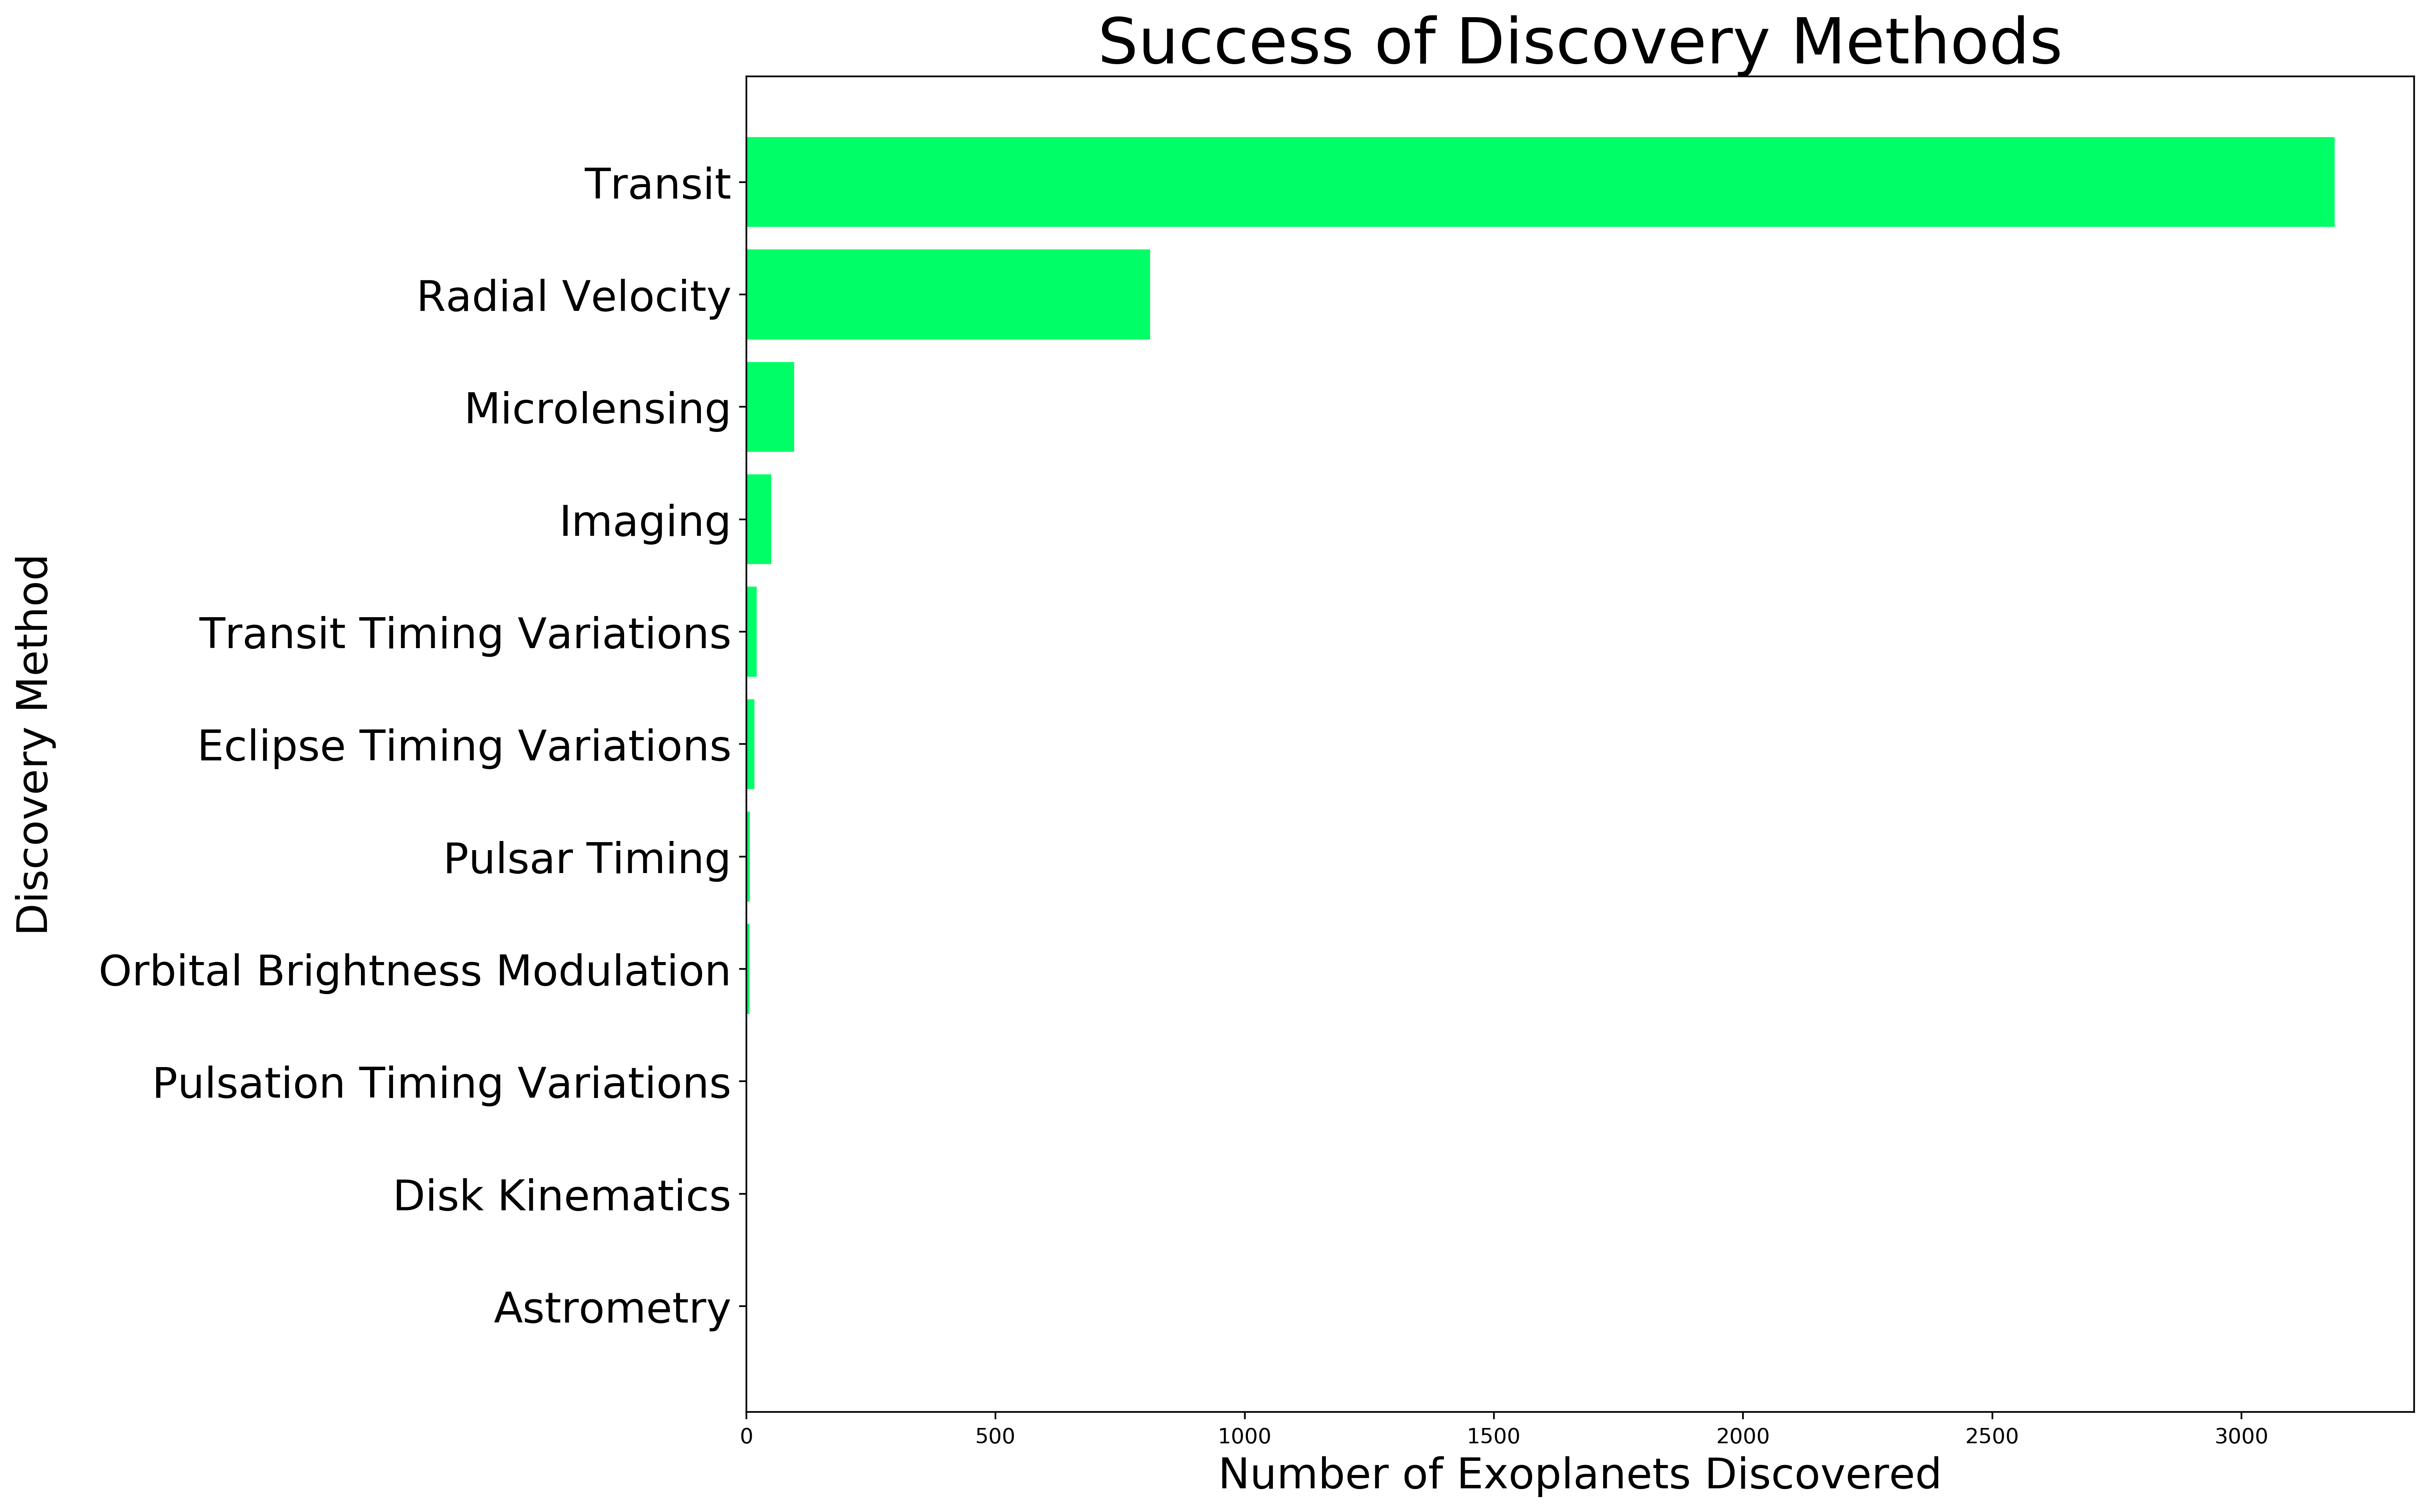

In [26]:
#4a: Discovery Methods Success 
ep_methods = ep.groupby(by='discovery_method', as_index = False).count()
ep_m = ep_methods.sort_values('planet_name', ascending = True)

fig_dp = plt.figure(num=None, figsize=(16, 10), dpi=400, facecolor='w', edgecolor='k')
x_values = ep_m['discovery_method']
y_values = ep_m['planet_name']

plt.xlabel('Number of Exoplanets Discovered', fontsize=20)
plt.ylabel('Discovery Method', fontsize=20, labelpad = 20)
plt.title('Success of Discovery Methods', fontsize=30)


plt.barh(x_values, y_values, color=(0, 1, 0.4, 1))
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()
fig_dp.savefig('Success of Discovery Methods', dpi=200)

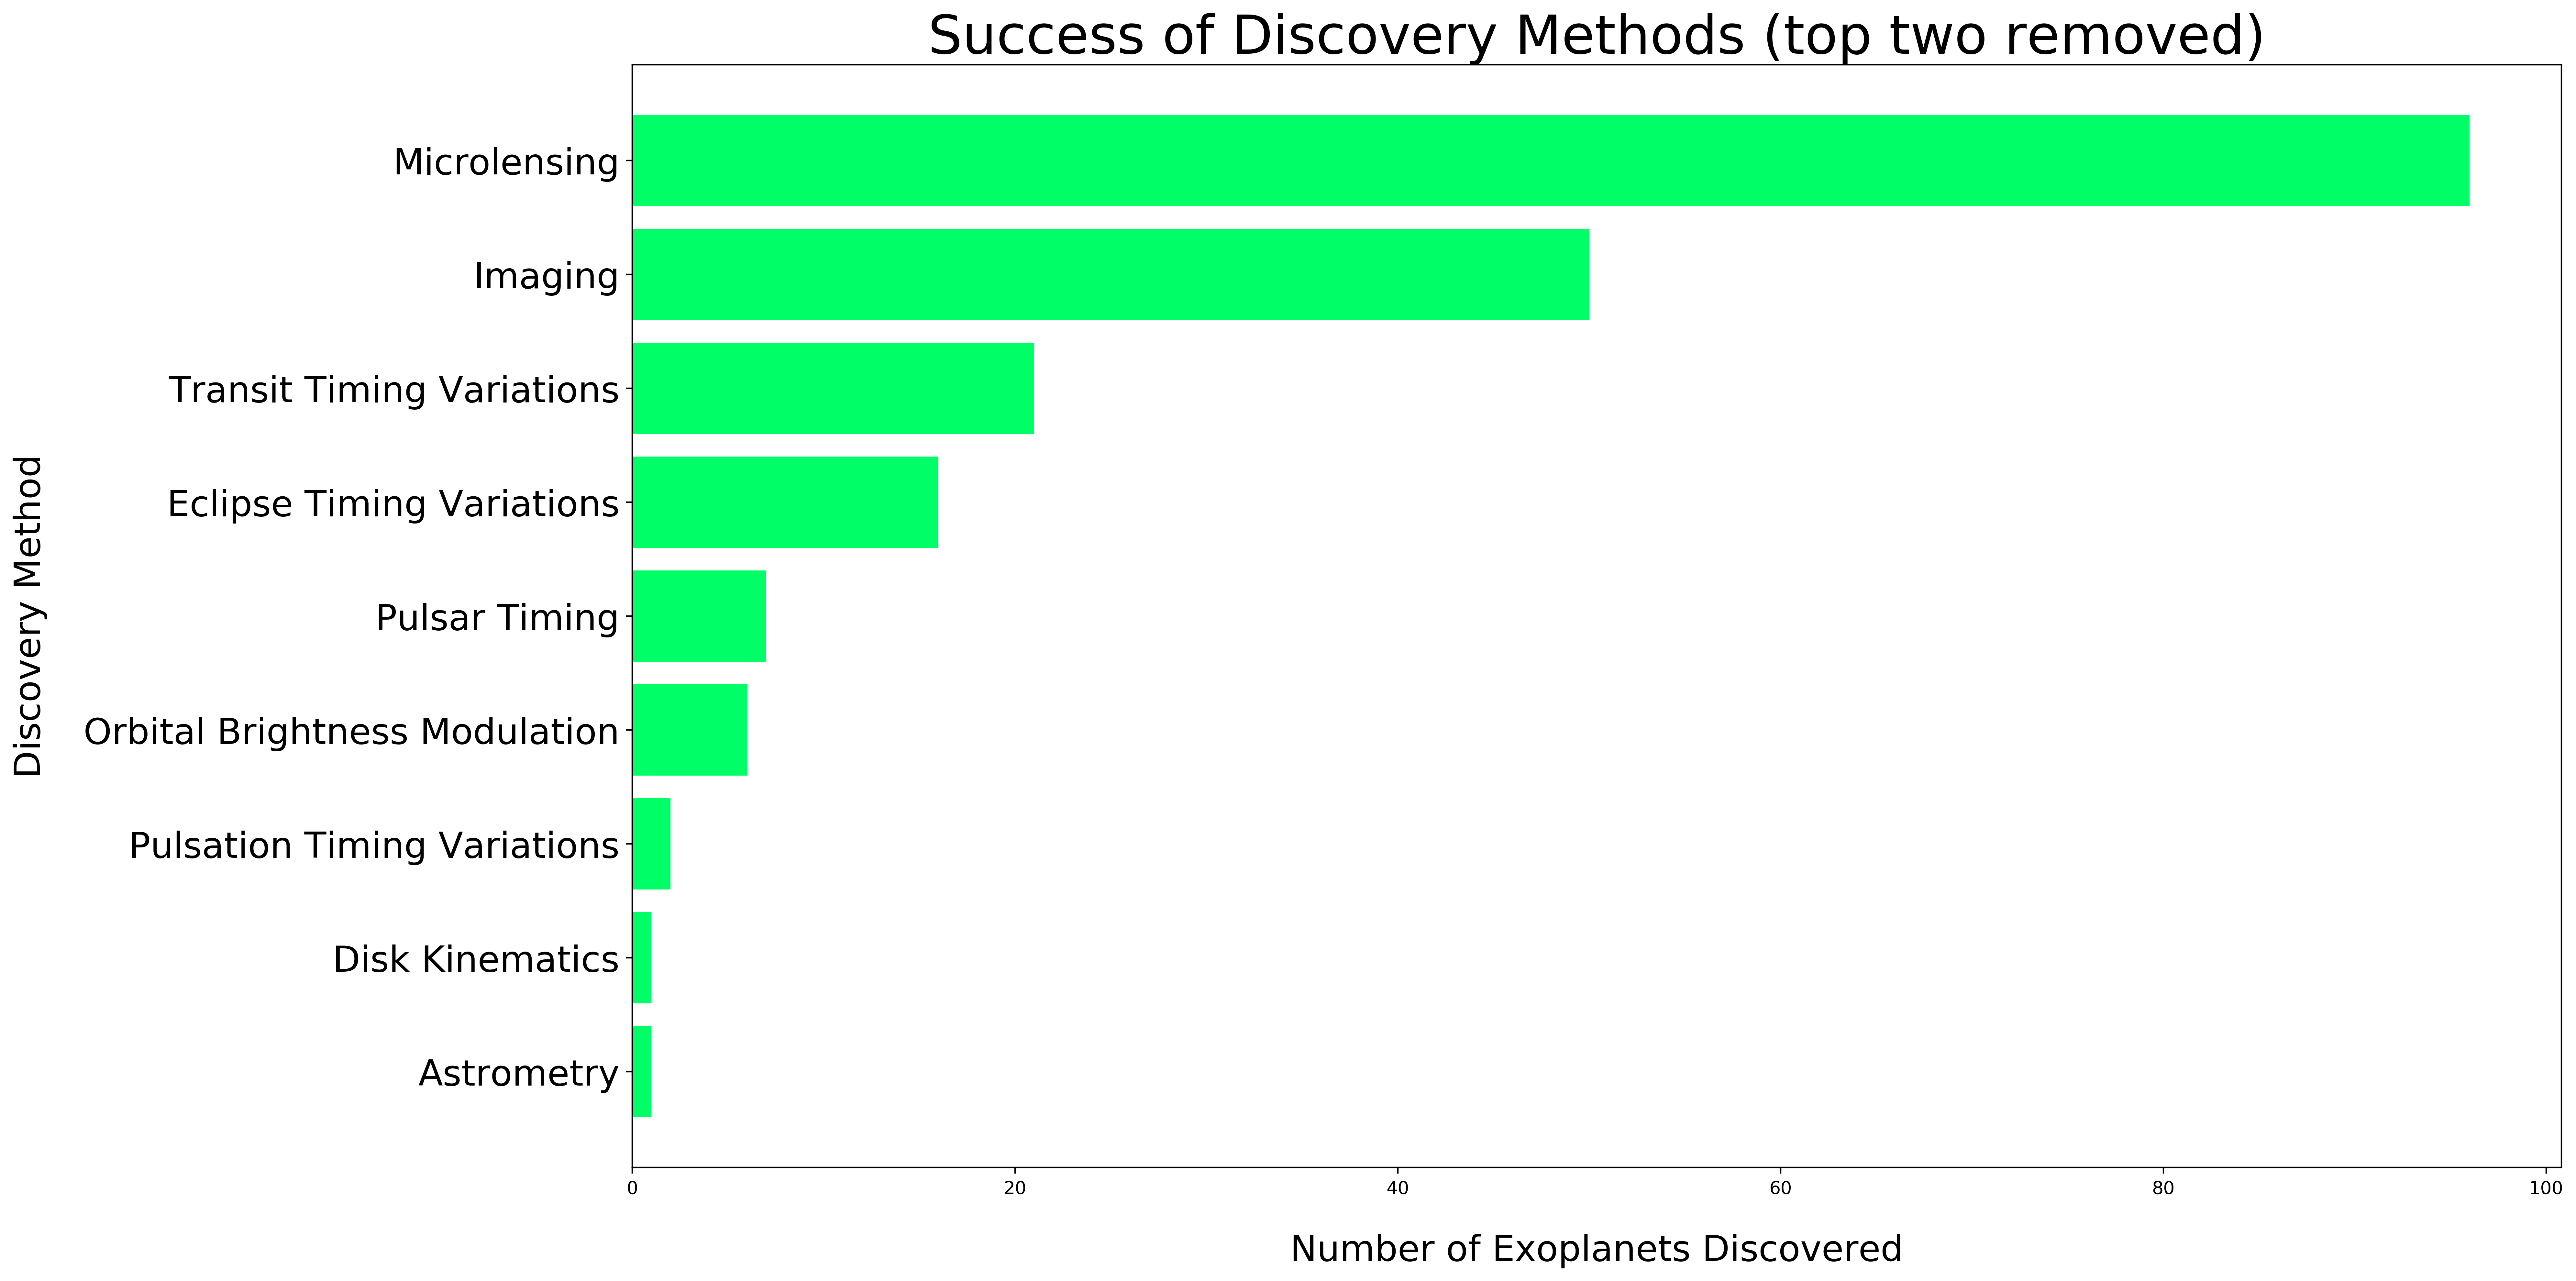

In [25]:
#4b: Methods Success w/o top 2
minor_methods0 = ep_m.loc[ep_m['discovery_method'] != 'Transit']
minor_methods = minor_methods0.loc[minor_methods0['discovery_method'] != 'Radial Velocity']

fig_dp2 = plt.figure(num=None, figsize=(20, 10), dpi=400, facecolor='w', edgecolor='k')
x_values = minor_methods['discovery_method']
y_values = minor_methods['planet_name']

plt.barh(x_values, y_values, color=(0, 1, 0.4, 1))
plt.yticks(fontsize=20)

plt.xlabel('Number of Exoplanets Discovered', fontsize=20, labelpad = 20)
plt.ylabel('Discovery Method', fontsize=20, labelpad = 20)
plt.title('Success of Discovery Methods (top two removed)', fontsize=30)
plt.tight_layout()

plt.show()
fig_dp2.savefig('Success of Discovery Methods (top two removed)', dpi=200)

In [41]:
minimum = ep['orbital_period'].min()
maximum = ep['orbital_period'].max()
median = ep['orbital_period'].median()
print(f'Minimum Orbital Period: {minimum}')
print(f'Median Orbital Period: {median}')
print(f'Maximum Orbital Period: {maximum}')

Minimum Orbital Period: 0.09070629
Median Orbital Period: 11.80101286
Maximum Orbital Period: 7300000.0
